# Proof of Series is 1d and datframe is 2d 

In [3]:
# https://www.youtube.com/live/QzoRUwz8DoM?si=XHO68I1HnUD5tsWZ&t=847

In [4]:
import pandas as pd
import numpy as np

# Having multiple index in series

In [5]:
index_val = [('cse',2019), ('csed',2020), ('ecse',2021), ('csed',2022), ('cse',2023),('rcse',2024), ('csed',2025)]
series = pd.Series(np.random.randint(1,100,7), index=index_val)
print(series)
print('|------------------------|')
print(series[('csed', 2025)]) 

(cse, 2019)     89
(csed, 2020)    10
(ecse, 2021)    88
(csed, 2022)    69
(cse, 2023)     80
(rcse, 2024)    12
(csed, 2025)     4
dtype: int32
|------------------------|
4


In [6]:
# Why making multindex series in this way is not a good option ? -> https://www.youtube.com/live/QzoRUwz8DoM?si=ykdCCJD2x3T0JRqY&t=1187
# because we can't access by single index like for example: Only `csed` or `2025`

In [7]:
# The correct way of making multindex series is to use `pd.MultiIndex.from_tuples` or pd.MultiIndex.from_product` -> 
# https://www.youtube.com/live/QzoRUwz8DoM?si=tAYvRJUTiSWxtSFO&t=1247

In [8]:
# 1. Using `pd.MultiIndex.from_tuples` to create a multi-index series

index_val = [('cse',2019), ('csed',2020), ('ecse',2021), ('csed',2022), ('cse',2023),('rcse',2024), ('csed',2025)]
multi_index1 = pd.MultiIndex.from_tuples(index_val)
print(multi_index1)
print(multi_index1.levels) # level gives all the unique values in that particular level
print(multi_index1.levels[0])
print(multi_index1.levels[1])

MultiIndex([( 'cse', 2019),
            ('csed', 2020),
            ('ecse', 2021),
            ('csed', 2022),
            ( 'cse', 2023),
            ('rcse', 2024),
            ('csed', 2025)],
           )
[['cse', 'csed', 'ecse', 'rcse'], [2019, 2020, 2021, 2022, 2023, 2024, 2025]]
Index(['cse', 'csed', 'ecse', 'rcse'], dtype='object')
Index([2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype='int64')


In [9]:
# 2. Using `pd.MultiIndex.from_product` to create a multi-index series
# so it will associate each value in the first list with all the values in the second list

index_val =  [('cse', 'csed', 'ecse', 'rcse'), (2024, 2025)]
multi_index2 = pd.MultiIndex.from_product(index_val)
print(multi_index2)

print(multi_index2.levels) # its like it give us distinct categories
print(multi_index2.levels[0]) # means only level 1 index

MultiIndex([( 'cse', 2024),
            ( 'cse', 2025),
            ('csed', 2024),
            ('csed', 2025),
            ('ecse', 2024),
            ('ecse', 2025),
            ('rcse', 2024),
            ('rcse', 2025)],
           )
[['cse', 'csed', 'ecse', 'rcse'], [2024, 2025]]
Index(['cse', 'csed', 'ecse', 'rcse'], dtype='object')


In [10]:
# creating a series with multindex object that we make above
rng = np.random.default_rng(77) # for reproducibility
multiIndex = pd.Series(rng.integers(1,100,8), index=multi_index2)
# so its like a hierarical tree structure, see -> https://www.youtube.com/live/QzoRUwz8DoM?si=HVVyVHUMJJw-WmjA&t=1547
multiIndex

cse   2024     6
      2025    78
csed  2024    63
      2025    55
ecse  2024    79
      2025    25
rcse  2024    86
      2025    34
dtype: int64

In [11]:
# how to fetch items from multiIndex series ?
multiIndex.loc[('csed')] # so it will give all the values of cse in 2024

2024    63
2025    55
dtype: int64

In [12]:
multiIndex.loc[('csed',2025)] # so it will give all the values of cse in 2024

np.int64(55)

In [13]:
# multindex series to dataframe using 
# `unstack` method
multiIndex.unstack()
# so it will give the values of `cse`,`csed`,`ecse`,`rcse` of 2024 and 2025 in a dataframe format

,2024,2025
cse,6,78
csed,63,55
ecse,79,25
rcse,86,34


In [14]:
pd.Series(index=multi_index1, data=[1,2,3,4,5,6,7]) # so it will give the values of cse in 2024 and 2025 in a dataframe format

cse   2019    1
csed  2020    2
ecse  2021    3
csed  2022    4
cse   2023    5
rcse  2024    6
csed  2025    7
dtype: int64

In [15]:
# multindex series to dataframe, using `unstack` method

pd.Series(index=multi_index1, data=[1,2,3,4,5,6,7]).unstack() # so it will give the values of cse in 2024 and 2025 in a dataframe format

,2019,2020,2021,2022,2023,2024,2025
cse,1.0,NaN,NaN,NaN,5.0,NaN,NaN
csed,NaN,2.0,NaN,4.0,NaN,NaN,7.0
ecse,NaN,NaN,3.0,NaN,NaN,NaN,NaN
rcse,NaN,NaN,NaN,NaN,NaN,6.0,NaN


In [16]:
# dataframe to multindex series using `stack` method
pd.Series(index=multi_index1, data=[1,2,3,4,5,6,7]).unstack().stack()

# Note: stack() and unstack() method explain in detail in below section

cse   2019    1.0
      2023    5.0
csed  2020    2.0
      2022    4.0
      2025    7.0
ecse  2021    3.0
rcse  2024    6.0
dtype: float64

## [But Why to use multi index series? 🤔](https://www.youtube.com/live/QzoRUwz8DoM?si=7RidvYCQQtHNAuqQ&t=2017)

## multiIndex dataframes

In [17]:
# multindex dataframes -> https://www.youtube.com/live/QzoRUwz8DoM?si=3ITFbPdL4nivLYYH&t=2137

In [18]:
multi_index1

MultiIndex([( 'cse', 2019),
            ('csed', 2020),
            ('ecse', 2021),
            ('csed', 2022),
            ( 'cse', 2023),
            ('rcse', 2024),
            ('csed', 2025)],
           )

In [19]:
branch_df1 = pd.DataFrame(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18],
        [19, 20, 21],
    ],
    index = multi_index1,
    columns= ['avg_package', 'avg_salary', 'avg_ability']
)
branch_df1.info()
branch_df1

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7 entries, ('cse', np.int64(2019)) to ('csed', np.int64(2025))
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   avg_package  7 non-null      int64
 1   avg_salary   7 non-null      int64
 2   avg_ability  7 non-null      int64
dtypes: int64(3)
memory usage: 774.0+ bytes


,,avg_package,avg_salary,avg_ability
cse,2019,1,2,3
csed,2020,4,5,6
ecse,2021,7,8,9
csed,2022,10,11,12
cse,2023,13,14,15
rcse,2024,16,17,18
csed,2025,19,20,21


In [20]:
# 1 important thing about indexes and columns in multindexes dataframes, is that pandas not treat indexes and columns as a single entity, so we can access them separately
# https://www.youtube.com/live/QzoRUwz8DoM?si=0VRVHTmiM_JLRkeu&t=2417
# so we can also make dataframe where columns will have hierarchical structure

In [21]:
# multiindex df from columns perspective -> https://www.youtube.com/live/QzoRUwz8DoM?si=adFShaAS0Dqztlmn&t=2547
branch_df2 = pd.DataFrame(
    [
        [1, 2, 10, 2],
        [3, 4, 0, 0],
        [5, 6, 10, 1],
        [7, 8, 0, 0],
    ],
    index = [2019, 2020, 2021, 2022],
    columns = pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']])
)

branch_df2



delhi               mumbai         
     avg_package students avg_package students
2019           1        2          10        2
2020           3        4           0        0
2021           5        6          10        1
2022           7        8           0        0

In [22]:
branch_df2['delhi','avg_package'] 

2019    1
2020    3
2021    5
2022    7
Name: (delhi, avg_package), dtype: int64

In [23]:
branch_df2.loc[2022] # so we get multiIndex series

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: 2022, dtype: int64

In [24]:
multi_index1

MultiIndex([( 'cse', 2019),
            ('csed', 2020),
            ('ecse', 2021),
            ('csed', 2022),
            ( 'cse', 2023),
            ('rcse', 2024),
            ('csed', 2025)],
           )

In [25]:
# MultiIndex in terms of both rows and columns

branch_df3 = pd.DataFrame(
    data = [
        [1, 2, 10, 2], # we give 8 rows because we have 8 rows in total (in `multi_index1`), and we give 4 columns because we have 4 columns in total 
        [3, 4, 0, 0],
        [5, 6, 10, 1],
        [7, 8, 0, 0],
        [9, 10, 0, 0],
        [11, 12, 0, 0],
        [13, 14, 0, 0],
    ],
    index = multi_index1,
    columns = pd.MultiIndex.from_product([['delhi', 'mumbai'], ['avg_package', 'students']])
)
branch_df3

    

delhi               mumbai         
          avg_package students avg_package students
cse  2019           1        2          10        2
csed 2020           3        4           0        0
ecse 2021           5        6          10        1
csed 2022           7        8           0        0
cse  2023           9       10           0        0
rcse 2024          11       12           0        0
csed 2025          13       14           0        0

In [26]:
branch_df3['delhi']['avg_package']['cse'][2019] # so we can say its 4d data(because we 4 indexes to reach a single value) represented in lower dimension(2d) `dataframe` 

np.int64(1)

## Stacking and unstacking in detail(dataframe methods)

In [27]:

branch_df4 = pd.DataFrame(
        data = [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
        ],
        index = pd.MultiIndex.from_product([['cse','ece'], [2019, 2020, 2021, 2022]]),
        columns = ['avg_package', 'students']
    )
# -> 
branch_df4



avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [28]:
# explaanation of what happens on unstack() call on branch_df4 -> https://www.youtube.com/live/QzoRUwz8DoM?si=-ZuQRphEo_AlkBme&t=3027

branch_df4.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [29]:
# Exaplanation of what happens when unstack calls 2 times on branch_df4 - https://www.youtube.com/live/QzoRUwz8DoM?si=jYpMl2Hd-_nsyF89&t=3227
branch_df4.unstack().unstack()
# from this what we observe is, that `unstack` keeps convert index(last index first) into columns(nested inside previous columns)

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [30]:
branch_df4

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [31]:
# now we will do opposite, means `stack` -> https://www.youtube.com/live/QzoRUwz8DoM?si=K2Fo8VB-be616Mjg&t=3417
# so stack converts columns into indexes, and it will keep converting columns into indexes(last column first) until all columns are converted into indexes
branch_df4.stack()


cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [32]:
""" And one thing more we observe is that if all the columns or rows are converting into indexes or columns respectively, 
then it will convert into a series, automatically """

' And one thing more we observe is that if all the columns or rows are converting into indexes or columns respectively, \nthen it will convert into a series, automatically '

In [33]:
# so what we done till now in this section, is that :
# 1. First we represent higher dimension data in lower dimension using dataframe(2d)
""" 2. And then we deciding(using `stack` and `unstack` methods)  how much row(we can say index too) will handle, 
and how much column will handle  """

' 2. And then we deciding(using `stack` and `unstack` methods)  how much row(we can say index too) will handle, \nand how much column will handle  '

## Wroking with multi-index dataframes
- [See this video to learn the topics realted to this section](https://www.youtube.com/live/QzoRUwz8DoM?si=gzsSAlxxWBmmIm9k&t=4137)

In [34]:

# first we will make 4d dataframe
branch_df5 = pd.DataFrame(
    data=[
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = pd.MultiIndex.from_product([['cse','ece'], [2019, 2020, 2021, 2022]]),
    columns = pd.MultiIndex.from_product([['delhi','mumbai'], ['avg_package', 'students']])
)
branch_df5

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [35]:
# head and tail -> https://www.youtube.com/live/QzoRUwz8DoM?si=PoBJPrbyw4JkLU20&t=4097
branch_df5.head(5) # so it will give first 5 rows, btw 5 inside head an tail is by default

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

In [36]:
# shape -> https://www.youtube.com/live/QzoRUwz8DoM?si=Z5wzEvpiSGrFFZor&t=4117
branch_df5.shape # remember we said that we convert higher dimension data into lower dimension, here in 8 rows and 4 columns,
""" so we have 32 values in total, so shape will be (8,4) but if we see the shape of `branch_df5` it is (8,4) but it has 32 values in total,
so we can say that it is a 4d data represented in dataframe
"""

' so we have 32 values in total, so shape will be (8,4) but if we see the shape of `branch_df5` it is (8,4) but it has 32 values in total,\nso we can say that it is a 4d data represented in dataframe\n'

In [37]:
# info() -> https://www.youtube.com/live/QzoRUwz8DoM?si=Qs8EU_i5-8Gr6DJ1&t=4137
branch_df5.info() 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ece', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 632.0+ bytes


In [38]:
# duplication check -> https://www.youtube.com/live/QzoRUwz8DoM?si=BBPWzrdn4SVTqPZy&t=4197
branch_df5.duplicated() # so it will give the boolean values of each row, if it is duplicated or not

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [39]:
# isnull() -> https://www.youtube.com/live/QzoRUwz8DoM?si=NPi9ks0oVDcSf3kH&t=4207
branch_df5.isnull() # so it will give the boolean values of each row and column, if it is null or not

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [40]:
# extracting rows single -> https://www.youtube.com/live/QzoRUwz8DoM?si=0IcDdhBX63VtCZTn&t=4267
branch_df5.loc['cse'].loc[2022] # or pass in tuple
branch_df5.loc[('cse',2022)] # so it same as what we do in above line

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [41]:
branch_df5

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [42]:
# let;s go more specific, we wanna find average package of ece of delhi , in 2022
# se we go from less specific to more specific and specific
branch_df5.loc[('ece',2022),('delhi','avg_package')]

np.int64(15)

In [43]:
# multiple
branch_df5.iloc[:5:2]
# you can do same with loc -> https://www.youtube.com/live/QzoRUwz8DoM?si=An5qUFCtEsCDQOWb&t=4407

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [44]:
branch_df5.loc[('cse',2019): ('ece',2019):2]
 # But Note: unlike `iloc` indexing, `loc` indexing is inclusive, so it will include the last index too

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [45]:
# Extracting cols
# extract only `delhi` column
branch_df5['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [46]:
branch_df5.iloc[:,1:3] 

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [47]:
# let's do indexing in both rows and columns
branch_df5.iloc[:5:4,1:3] # with fancy indexing `branch_df5.iloc[[0,4],[1,2]]`

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [48]:
# sort index of multiIndex dataframe -> https://www.youtube.com/live/QzoRUwz8DoM?si=XlaKEdkWsC-__ZM6&t=4717
branch_df5.sort_index(ascending=False) # so it sort all index(of all levels) in descending order



delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [49]:
# but what if we wanna sort branch index(level 0 index) in descending order but years(level 2 index) in ascending order
branch_df5.sort_index(ascending=[False,True]) 

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [50]:
# sort on level1 only
branch_df5.sort_index(level=1, ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
cse 2022           7        8           0        0
ece 2021          13       14           0        0
cse 2021           5        6           0        0
ece 2020          11       12           0        0
cse 2020           3        4           0        0
ece 2019           9       10           0        0
cse 2019           1        2           0        0

In [51]:
# sorting columns (sort on all columns)
branch_df5.sort_index(axis=1,ascending=False)

mumbai                delhi            
         students avg_package students avg_package
cse 2019        0           0        2           1
    2020        0           0        4           3
    2021        0           0        6           5
    2022        0           0        8           7
ece 2019        0           0       10           9
    2020        0           0       12          11
    2021        0           0       14          13
    2022        0           0       16          15

In [52]:
branch_df5

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [53]:
# transpose -> make columns as index and index as columns
branch_df5.T # it is same as branch_df5.transpose()


cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [54]:
# swap level of indexes
branch_df5.swaplevel() # by default axis is 0, so it will swap level 0 and 1, "on indexes"

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [55]:
# swap level of columns

branch_df5.swaplevel(axis=1) # means it will swap level 1 and 2 "on columns" 

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

## Long/Tall vs wide data, and `melt`, `pivot`, `pivot_table` methods

In [56]:
# Understanding difference between long and wide data -> https://www.youtube.com/live/QzoRUwz8DoM?si=sa7lIJTjXIZ-v5hf&t=5277


In [57]:
# Wide format -> https://www.youtube.com/live/QzoRUwz8DoM?si=x3AGp4LosVywive9&t=5337

In [58]:
# --------------------------------------- Melt  ----------------------------------------
# Understand `melt` method with examples -> https://www.youtube.com/live/QzoRUwz8DoM?si=lWX6pmjqXGhgyjmO&t=5577
# Real world examples ->  https://www.youtube.com/live/QzoRUwz8DoM?si=cY-SJmPT0N5rVnJo&t=6117

In [59]:
# `melt` is used to convert wide format to long format
toBeMeltdf = pd.DataFrame({'cse':[120]})
toBeMeltdf

,cse
0,120


In [60]:
toBeMeltdf.melt()  


,variable,value
0,cse,120


In [61]:
pd.DataFrame({'cse':[120], 'ece':[130],'mech':[140]})

,cse,ece,mech
0,120,130,140


In [62]:
# so for each dataPoint, it will dedicate as number of rows, as no. of columns
# you can also provide `var_name` and `value_name` to rename columns and their values, default is 'variable' and 'value' 
pd.DataFrame({'cse':[120], 'ece':[130],'mech':[140]}).melt(var_name='branch', value_name='no_of_students')

,branch,no_of_students
0,cse,120
1,ece,130
2,mech,140


In [63]:
import pandas as pd

# prevent specific columns from being included in the melt operation

meltdf2 = pd.DataFrame(
    {
        'branch': ['cse', 'ece', 'mech'],
        '2020': [100, 150, 60],
        '2021': [120, 130, 80],
        '2022': [150, 140, 70]
    }
)

meltdf2

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,80,70


In [64]:
# we wannna exclude 'branch' column to be come in melt operation
meltdf2.melt(id_vars=['branch'], var_name='year', value_name='no_of_students')

,branch,year,no_of_students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [65]:
# ---------------------------------- Pivot ---------------------------------------


In [66]:
# Understand Pivot before pivot_table, and difference between pivot and pivot_table ()
# -> https://youtu.be/2ahgn73YReA?si=YAHtzWw9ygFe18Pf&t=47

In [67]:
pivot_df = pd.DataFrame({
    'date': ['5/1/2017', '5/2/2017', '5/3/2017', 
             '5/1/2017', '5/2/2017', '5/3/2017',
             '5/1/2017', '5/2/2017', '5/3/2017'],
    'city': ['new york', 'new york', 'new york',
             'mumbai', 'mumbai', 'mumbai',
             'beijing', 'beijing', 'beijing'],
    'temperature': [65, 66, 68, 75, 78, 82, 80, 77, 79],
    'humidity': [56, 58, 60, 80, 83, 85, 26, 30, 35]
})
pivot_df

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [68]:
# If you notice it also remove duplicates
pivot_df.pivot(index='date', columns='city')


temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

In [69]:
pivot_df.pivot(index='date', columns='city', values='temperature')


city,beijing,mumbai,new york
date,,,
5/1/2017,80,75,65
5/2/2017,77,78,66
5/3/2017,79,82,68


In [70]:
# ---------------------------------- Pivot table ---------------------------------------
# Understand `pivot table` method with examples -> https://www.youtube.com/live/UE6DmRQJ2w8?si=qYiJLUaFiTKgyJK0&t=407

In [71]:
# we gernerally use pivot tables on categotical columns

import seaborn as sns
artificial_df = sns.load_dataset('tips')
# seaborn provide some toy datasets

artificial_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [72]:
# # [['total_bill']] , for see representation of data in datframe, while indexing
artificial_df.groupby('sex')['total_bill'].mean() 

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_7356\143757394.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  artificial_df.groupby('sex')['total_bill'].mean()


sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [73]:
artificial_df.groupby(['sex', 'smoker'])['total_bill'].mean().unstack()

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_7356\2036885826.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  artificial_df.groupby(['sex', 'smoker'])['total_bill'].mean().unstack()


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [74]:
# the shortcut of above cell code is pivot table 
# Understand this by example and explanation ->git  https://www.youtube.com/live/UE6DmRQJ2w8?si=525LQc7USJR1Qwkg&t=857

# `values` param is used to specify which column you want to apply `aggfunc` on
# if you not give `values` param value, it will apply `aggfunc on all numerical columns
# pivot table also has `fill_value` param to fill missing values, by default it is NaN 
artificial_df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='mean') 
# by_default also `aggfunc` value is mean, we can use other functions like sum, min, max, std, var, count etc.

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_7356\3784055925.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  artificial_df.pivot_table(index='sex', columns='smoker', values='total_bill', aggfunc='mean')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [75]:
# multidimensional pivot table, 
artificial_df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], values=['total_bill','size'], aggfunc={'total_bill':'mean', 'size':'max'})

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_7356\2142938004.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  artificial_df.pivot_table(index=['sex', 'smoker'], columns=['day', 'time'], values=['total_bill','size'], aggfunc={'total_bill':'mean', 'size':'max'})


size                                   total_bill         \
day            Thur          Fri           Sat    Sun       Thur          
time          Lunch Dinner Lunch Dinner Dinner Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes      4.0    NaN   2.0    4.0    5.0    5.0  19.171000    NaN   
       No       6.0    NaN   NaN    2.0    4.0    6.0  18.486500    NaN   
Female Yes      4.0    NaN   2.0    2.0    4.0    3.0  19.218571    NaN   
       No       6.0    2.0   3.0    2.0    4.0    5.0  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [76]:
""" margins, by default it is False, if it is True, it will perofrom aggfunc on all values (for rows and columns),
basically it gives total of each column and row in the result, and give use new column and row named 'All' """
# See how this works -> https://www.youtube.com/live/UE6DmRQJ2w8?si=1a-EWkeiq8jVe5h9&t=1447
artificial_df.pivot_table(index=['sex'], columns=['smoker'], values=['tip'], aggfunc='sum', margins=True)

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_7356\2961522375.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  artificial_df.pivot_table(index=['sex'], columns=['smoker'], values=['tip'], aggfunc='sum', margins=True)


tip                
smoker     Yes      No     All
sex                           
Male    183.07  302.00  485.07
Female   96.74  149.77  246.51
All     279.81  451.77  731.58

In [77]:
# Powerful graphs using pivot tables -> https://www.youtube.com/live/UE6DmRQJ2w8?si=MiVZDQqxu6_1c4GM&t=1527

# convert your particular column to dateTime, and dateTime operations that can be performed -> https://www.youtube.com/live/UE6DmRQJ2w8?si=NjZ5BoJTvUz30wLI&t=1717

In [ ]:

artificial_df.pivot_table(index=['sex'], columns=['smoker'], values=['tip'], aggfunc='sum', margins=True)

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_7356\2354264725.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  artificial_df.pivot_table(index=['sex'], columns=['smoker'], values=['tip'], aggfunc='sum', margins=True)


tip                
smoker     Yes      No     All
sex                           
Male    183.07  302.00  485.07
Female   96.74  149.77  246.51
All     279.81  451.77  731.58

C:\Users\Vedansh\AppData\Local\Temp\ipykernel_7356\389851338.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  artificial_df.pivot_table(index=['sex'], columns=['smoker'], values=['tip'], aggfunc='sum')['tip'].plot(kind='bar')


<Axes: xlabel='sex'>

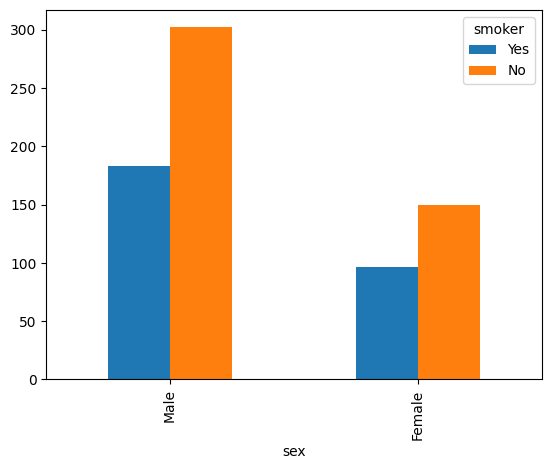

In [ ]:


# One thing you Note: each column is represented with some different color, and total bars are total values in the dataframe
# total each color bar means total values for that particular column
# indexes are placed on x-axis

# And these observations extrapolated to any other type of graph also

artificial_df.pivot_table(index=['sex'], columns=['smoker'], values=['tip'], aggfunc='sum')['tip'].plot(kind='bar')